# 딥러닝 기초(첫째 마당)
## 인공지능, 머신러닝, 딥러닝

* 인공지능: 사람이 할 수 있는 일을 컴퓨터가 하게 만드는 것

    * 머신러닝: 인공지능 중, 이전의 데이터를 이용해 미래 일을 예측하게 하는 기법

        * 딥러닝: 머신러닝 알고리즘 중 가장 좋은 효과를 내는 것

* 딥러닝을 위해 필요한 것

    * 데이터

        * 데이터에 딸린 이름표의 유무에 따라 딥러닝을 지도(CNN, RNN)/비지도(GAN, 오토인코더) 학습이라고 구분

    * 컴퓨터

        * CPU < GPU

    * 프로그램

## 미지의 일을 예측하는 원리

> 예시. 수술 전 수술 후 생존율을 수치로 예측하는 방법? -> 그동안 집도한 수술 환자의 수술 전 상태와 수술 후 생존율을 정리해 놓은 데이터를 머신러닝 알고리즘에 입력

* 학습: 데이터가 입력되고 패턴이 분석되는 과정

    * 깨끗한 좌표 평면 위에 기존 환자들을 하나씩 배치하는 과정. 그  분포도 위에 수술 성공과 실패 여부를 구분짓는 경계를 그려넣고 저장해서 새 환자가 오면 이와 대조해 보고 수술 결과를 예측하는 것


## 딥러닝 개괄

* 간단한 모델 학습 구조

    1. 환경 준비: 딥러닝 구동 위한 라이브러리 호출

        1. 라이브러리: 특정 기능을 담은 작은 프로그램들을 모아 둔 것. 파이썬은 이게 풍부함
    
    ```python
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    import numpy as np
    ```


    2. 데이터 준비: 데이터를 불러와 사용 준비, 알고리즘이나 좋은 컴퓨터 환경만큼 중요한 것이 좋은 데이터를 준비하는 것

        * 데이터를 면밀히 관찰할 것. 속성(attribute)과 클래스(class)로 데이터 항목을 나눌 수 있고, 클래스는 이름표.

    
    ```python
    !git clone https://github.com/taehojo/data.git

    Data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter = ",") # 파일명이 thoracic의 오타
    X = Data_set[:,0:16]
    y = Data_set[:,16]
    ```

    3. 구조 결정: 딥러닝 구조

        * 텐서플로는 비행기, 케라스는 조종사

        * 딥러닝 설계란? 몇 개의 층을 어떻게 쌓을지, Dense 외에 어떤 층을 사용할지, 내부 변수를 어떻게 정해야 하는지 등에 대한 고민. 이는 데이터의 종류와 설계의 목적에 따라 딥러닝 설계가 결정

            * 각 설정과 의미를 알고 이것을 자유롭게 구성할 수 있는지가 딥러닝을 잘 다루는지 여부를 결정함
    ```python
    model = Sequential()
    model.add(Dense(30, input_dim = 16, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    ```
    4. 모델 실행: 만들어 놓은 모델을 실행

        * 딥러닝 기본 방식은 여러 층을 한 번만 통과하는 게 아니라 여러 차례 오가며 최적의 모델을 찾는 것. '오가는 횟수', '한 번 오갈 때 몇 개의 데이터를 사용할 것인지'를 정하는 함수가 .fit()

    ```python
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X, y, epochs=5, batch_size=16)
    ```

In [1]:
import tensorflow
print(tensorflow.__version__)

2.9.2


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

!git clone https://github.com/taehojo/data.git

Data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter = ",")
X = Data_set[:,0:16]
y = Data_set[:,16]

model = Sequential()
model.add(Dense(30, input_dim = 16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=5, batch_size=16)

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Unpacking objects: 100% (21/21), done.
Epoch 1/5
30/30 [==============================] - 1s 2ms/step - loss: 5.2828 - accuracy: 0.2149
Epoch 2/5
30/30 [==============================] - 0s 2ms/step - loss: 1.0716 - accuracy: 0.8234
Epoch 3/5
30/30 [==============================] - 0s 2ms/step - loss: 0.8784 - accuracy: 0.8191
Epoch 4/5
30/30 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.8213
Epoch 5/5
30/30 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.8277


# 예측 모델 기본 원리(둘째 마당)

## 가장 훌륭한 예측선

* 선형회귀

> "학생들의 중간고사 성적이 [ ]에 따라 다 다르다."

* [ ]에 들어갈 '정보'를 독립 변수, 그에 따라 종속적으로 변하는 y를 종속 변수라고 함

    * x가 하나인지, 두 개 이상인지에 따라 단순/다중 선형회귀로 나뉨

* $y = ax + b$로 데이터에서 주어진 점들의 특징을 담은 직선을 표현하는 것. a, b의 최적값을 찾아내는 것이 선형 회귀

    * 왜? 기존 데이터에 드러있지 않은 여러 내용을 유추할 수 있기에


### 최소제곱법(method of least squares)

$$a = ((x-x 평균)(y-y 평균)의 합)\over(x-x 평균)^2의 합$$

$$b = y 평균 - (x 평균 * a)


In [3]:
import numpy as np
x = np.array([2, 4, 6, 8]) # 공부한 시간
y = np.array([81, 93, 91, 97]) # 점수

mx = np.mean(x)
my = np.mean(y)

print("x 평균: ", mx)
print("y 평균: ", my)

divisor = sum([(i-mx)**2 for i in x])

def numerator(x, mx, y, my):
    n = 0
    for i in range(len(x)):
        n += (x[i] - mx) * (y[i] - my)
    return n

dividend = numerator(x, mx, y, my)

print("분모: ", divisor)
print("분자: ", dividend)

a = dividend / divisor
b = my - (mx * a) 

print("기울기 a = ", a)
print("y 절편 b = ", b)

x 평균:  5.0
y 평균:  90.5
분모:  20.0
분자:  46.0
기울기 a =  2.3
y 절편 b =  79.0


### 평균 제곱 오차

* 단순 선형 회귀 -> 최소 제곱법

    * 하지만 다중일 경우? 최소 제곱법 이용 불가. '일단 그리고 조금씩 수정해 나가기 방식' 주로 이용

    * 가설 설정 -> 이 값이 주어진 요건 충족? 이 답에 따라 조금씩 변화 주고, 변화가 긍정적이면 오차가 최소로 될 때까지 과정을 반복

    * 나중에 그린 선을 이전 선에 비교해서 좋은지 나쁜지 판단하는 방법 -> 평균 제곱 오차(MSE)

 $$평균 제곱 오차(MSE) = \frac{\sum_(y_{i} - \hat{y_{i}})^2}{n}$$


In [ ]:
import numpy as np 

fake_a = 3
fake_b = 76

x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

def predict(x):
    return fake_a * x + fake_b

predict_result = []

for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i],y[i], predict(x[i])))

n = len(x)
def mse(y, y_pred):
    return (1/n)*sum((y-y_pred)**2)

print("평균 제곱 오차: " + str(mse(y, predict_result)))

## 선형 회귀 모델: 먼저 긋고 수정하기
* 기울기 a를 너무 크거나 작게 잡으면 오차가 커지는 것을 확인 가능
  * 기울기와 오차 사이에는 이차 함수 관계가 있음
* 그렇다면 오차가 가장 작을 때는?
  * 그래프 가장 아래 볼록한 곳에 이르렀을 때. 여기까지 닿게 하는 것이 경사하강법(gradient descent)

### 경사하강법
* 반복적으로 기울기 a를 변화시켜서 m 값을 찾아내는 방법
* 학습률(learning rate)
  * 기울기의 변화율
* 경사하강법: 오차의 변화에 따라 이차 함수 그래프를 만들고 적절한 학습률을 설정해 미분 값이 0인 지점을 구하는 것

* 평균 제곱 오차 식에서 $\hat{y_{i}} = ax_{i}+b$를 대입하면

 $$평균 제곱 오차(MSE) = \frac{\sum_(y_{i} - (ax_{i}+b))^2}{n}$$

 * 이걸 각각 우리가 궁금해하는 값인 a와 b로 편미분해야 함

```python
y_pred = a * x + b
error = y - y_pred

a_diff = (2/n) * sum(-x * (error) # 오차 함수를 a로 편미분한 값
b_diff = (2/n) * sum(-(error)) # b로 편미분한 값

lr = 0.03 # 학습률: 경험적으로 찾은 것. 자동으로 최적 학습률을 찾아주는 알고리즘을 사용할 수도 있음
a = a - lr * a_diff # a 업데이트
b = b - lr * b_diff # b 업데이트
```

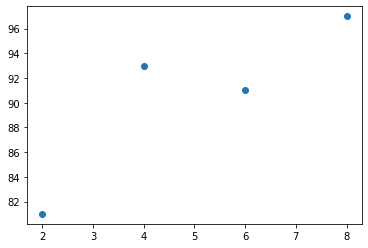

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


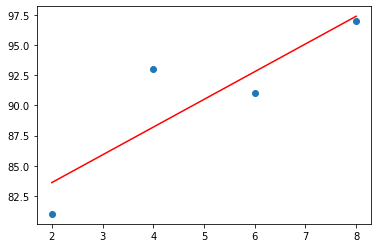

In [5]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.array([2, 4, 6, 8]) # 공부 시간
y = np.array([81, 93, 91, 97]) # 성적

plt.scatter(x, y)
plt.show()

a = 0
b = 0

lr = 0.03

epochs = 2001

n = len(x)

for i in range(epochs):

  y_pred = a * x + b
  error = y - y_pred

  a_diff = (2/n) * sum(-x * (error)) # 오차 함수를 a로 편미분한 값
  b_diff = (2/n) * sum(-(error)) # b로 편미분한 값

  a = a - lr * a_diff # a 업데이트
  b = b - lr * b_diff # b 업데이트

  if i % 100 == 0: # 100번 반복시마다 현재 a, b값 출력
    print("epoch=%.f, 기울기=%.04f, 절편=%.04f" %(i, a, b))

y_pred = a * x + b

plt.scatter(x, y)
plt.plot(x, y_pred, 'r')
plt.show() 

## 다중 선형 회귀
* 공부 시간 외 영향을 끼치는 다양한 변수를 사용하여 정확한 예측을 도출



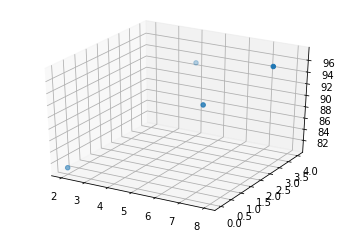

epoch=0, 기울기1=9.2800, 기울기2=4.2250, 절편=1.8100
epoch=100, 기울기1=9.5110, 기울기2=5.0270, 절편=22.9205
epoch=200, 기울기1=7.3238, 기울기2=4.2950, 절편=37.8751
epoch=300, 기울기1=5.7381, 기울기2=3.7489, 절편=48.7589
epoch=400, 기울기1=4.5844, 기울기2=3.3507, 절편=56.6800
epoch=500, 기울기1=3.7447, 기울기2=3.0608, 절편=62.4448
epoch=600, 기울기1=3.1337, 기울기2=2.8498, 절편=66.6404
epoch=700, 기울기1=2.6890, 기울기2=2.6962, 절편=69.6938
epoch=800, 기울기1=2.3653, 기울기2=2.5845, 절편=71.9160
epoch=900, 기울기1=2.1297, 기울기2=2.5032, 절편=73.5333
epoch=1000, 기울기1=1.9583, 기울기2=2.4440, 절편=74.7103
epoch=1100, 기울기1=1.8336, 기울기2=2.4009, 절편=75.5670
epoch=1200, 기울기1=1.7428, 기울기2=2.3695, 절편=76.1904
epoch=1300, 기울기1=1.6767, 기울기2=2.3467, 절편=76.6441
epoch=1400, 기울기1=1.6286, 기울기2=2.3301, 절편=76.9743
epoch=1500, 기울기1=1.5936, 기울기2=2.3180, 절편=77.2146
epoch=1600, 기울기1=1.5681, 기울기2=2.3092, 절편=77.3895
epoch=1700, 기울기1=1.5496, 기울기2=2.3028, 절편=77.5168
epoch=1800, 기울기1=1.5361, 기울기2=2.2982, 절편=77.6095
epoch=1900, 기울기1=1.5263, 기울기2=2.2948, 절편=77.6769
epoch=2000, 기울기1=1.5191, 기울기2=2.2

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

x1 = np.array([2, 4, 6, 8]) # 공부 시간
x2 = np.array([0, 4, 2, 3]) # 과외 시간
y = np.array([81, 93, 91, 97]) # 성적

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter3D(x1, x2, y);
plt.show()

a1 = 0
a2 = 0
b = 0

lr = 0.01

epochs = 2001

n = len(x1) # x 값이 몇 개인지. x1과 x2 수가 같으므로 x1만

for i in range(epochs):

  y_pred = a1 * x1 + a2 * x2 + b
  error = y - y_pred

  a1_diff = (2/n) * sum(-x1 * (error)) # 오차 함수를 a로 편미분한 값
  a2_diff = (2/n) * sum(-x2 * (error)) # 오차 함수를 a로 편미분한 값
  b_diff = (2/n) * sum(-(error)) # b로 편미분한 값

  a1 = a1 - lr * a1_diff # a1 업데이트
  a2 = a2 - lr * a2_diff # a2 업데이트
  b = b - lr * b_diff # b 업데이트

  if i % 100 == 0: # 100번 반복시마다 현재 a1, a2, b값 출력
    print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" %(i, a1, a2, b))

print("실제 점수: ", y)
print("예측 점수: ", y_pred)

### 텐서플로 활용

$$y = ax+b > H(x) = wx + b$$

* 선형 회귀는 현상 분석 방법

  * 기울기 a, 절편 b

* 머신 러닝은 이 방법을 통해 예측 모델을 만드는 것

  * 가중치 w, 편향 b, 가설함수 H(x)

* 손실 함수

  * 평균 제곱 오차처럼 실제값과 예측값 사이 오차에 대한 식

*  옵티마이저

  * 경사 하강법과 같이 최적의 기울기와 절편을 찾기 위한 방법으로 이용되는 것

* 활성화 함수

  * 입력값을 다음 층으로 넘길 때 각 값을 어떻게 처리할지를 결정하는 함수

* 텐서플로에서 다중 선형회귀를 적용하기 위해서는 input_dim을 바꿔줄 것.

In [ ]:
# 단순 선형 회귀
import numpy as np 
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = np.array([2, 4, 6, 8]) # 공부 시간
y = np.array([81, 93, 91, 97]) # 성적

model = Sequential()

model.add(Dense(1, input_dim=1, activation='linear'))

model.compile(optimizer='sgd', loss='mse')

model.fit(x, y, epochs=2000)

plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r')
plt.show()

# 임의의 시간을 집어넣어 점수 예측하는 모델을 테스트
hour = 7
prediction = model.predict([hour])
print("%.f시간을 공부할 경우의 예상 점수는 %.02f점입니다." % (hour, prediction))

In [ ]:
# 다중 선형 회귀
import numpy as np 
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = np.array([[2,0], [4,4], [6,2], [8,3]]) # 공부 시간
y = np.array([81, 93, 91, 97]) # 성적

model = Sequential()

model.add(Dense(1, input_dim=2, activation='linear'))

model.compile(optimizer='sgd', loss='mse')

model.fit(x, y, epochs=2000)

# 임의의 시간을 집어넣어 점수 예측하는 모델을 테스트
hour = 7
private_class = 4
prediction = model.predict([[hour,private_class]])
print("%.f시간을 공부하고 %.f 시간 과외를 받을 경우의 예상 점수는 %.02f점입니다." % (hour, private_class, prediction))

## 로지스틱 회귀 모델: 참 거짓 판단
> "예, 아니오로만 대답하세요!"

* 0, 1로만 구성되어 있는 데이터가 있다면 이는 직선으로 그리기 어려우므로 S자 형태의 선으로 그려야 함

### 시그모이드 함수

* S자 형태 그래프로 그려지는 함수

$$y = \frac{1}{ 1+ e^{-(ax+b)}} $$

* 여기서도 $y = ax+b $를 구하는 것은 같음

  * a, b의 의미는?

    * a: 그래프의 경사도(크면 수직에 가깝고 작으면 완만한 언덕 느낌)

    * b: 그래프의 좌우 이동

    * 따라서 a, b에 따라 오차가 변함

      * a, b 값의 오차에 대한 관계는 각각 다름

### 교차 엔트로피 오차

$$ {-{ylog(h)-(1-y)log(1-h)}}$$

### 텐서플로 로지스틱 회귀 실행

* activation, loss 변경하면 선형 회귀와 유사함




스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 2502/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2658
Epoch 2503/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2658
Epoch 2504/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2657
Epoch 2505/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2657
Epoch 2506/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2656
Epoch 2507/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2656
Epoch 2508/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2655
Epoch 2509/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2655
Epoch 2510/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2654
Epoch 2511/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2654
Epoch 2512/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2653
Epoch 2513/5000
1/1 [==============================] - 0s 5ms/

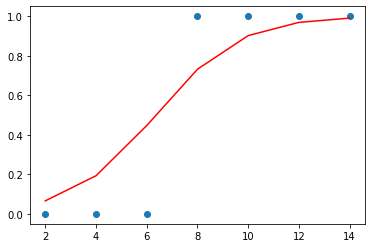

1/1 [==============================] - 0s 125ms/step
7시간을 공부할 경우 합격 예상 확률은 59.8점입니다.


In [12]:
import numpy as np 
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = np.array([2,4,6,8,10,12,14])
y = np.array([0,0,0,1,1,1,1])

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy')

model.fit(x, y, epochs=5000)

plt.scatter(x,y)
plt.plot(x,model.predict(x), 'r')
plt.show()
# 임의의 시간을 집어넣어 점수 예측하는 모델을 테스트
hour = 7
prediction = model.predict([hour])
print("%.f시간을 공부할 경우 합격 예상 확률은 %.01f점입니다." % (hour, 100*prediction))

# 신경망
## 퍼셉트론
* 입력을 여러 개 받아 출력을 만들고, 입력 값에는 가중치를 조절할 수 있게 만들어 '학습'을 가능하게 함(1957년 프랑크 로젠블랫)

* 아달라인(adaline)

  * 경사 하강법을 퍼셉트론에 도입해 최적의 경계선 그리기

* 퍼셉트론의 과제

  * XOR 문제를 해결할 수 없음

    * 두 개의 게이트 중 둘 중 하나만 1일 때 1이 출력되는 것

    * 이것은 **다층 퍼셉트론**, **오차 역전파**를 통해 해결

## 다층 퍼셉트론

* 퍼셉트론 두 개를 한 번에 계산!

  * 퍼셉트론 두 개를 각각 처리하는 은닉층을 만듦